<a href="https://colab.research.google.com/github/zackdihel/ECON-5200-Data-Analytics/blob/main/Lab%203/%5BLab_3%5D_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install wbgapi

In [55]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#BOL is Bolivia
country_codes = ['BOL', 'LMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [57]:
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(1980, 2025))

Fetching data...


In [58]:
df = df_raw.T

In [59]:
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()
df

economy            BOL                                                  \
series  FP.CPI.TOTL.ZG GC.TAX.TOTL.GD.ZS NE.CON.GOVT.ZS NE.EXP.GNFS.ZS   
Year                                                                     
1980         47.241650               NaN      13.841577      24.527454   
1981         32.133601               NaN      13.290692      23.266326   
1982        123.535719               NaN      11.801632      29.064379   
1983        275.586284               NaN       9.028303      28.316787   
1984       1281.349942               NaN      13.309599      23.654863   
1985      11749.639632          8.258114      10.561300      19.049933   
1986        276.335968          8.019955       9.447475      21.324012   
1987         14.578698          7.949053      11.125708      19.630475   
1988         16.002091          7.280551      11.386516      18.767447   
1989         15.173468          7.094743      11.940659      22.498216   
1990         17.118775          7.236225      11.755482      22.776982   
1991         21.447070          7.932730      12.074731      21.479347   
1992         12.060324          8.899789      12.870502      20.045762   
1993          8.527877          9.516345      13.370437      19.080765   
1994          7.874044         10.045468      13.567906      21.663312   
1995         10.193207          9.722329      13.572620      22.551422   
1996         12.425487         12.293853      13.327267      22.581871   
1997          4.708444         12.620346      13.903529      21.110603   
1998          7.673229         13.546529      14.218871      19.698685   
1999          2.159516         12.039785      14.797893      16.880899   
2000          4.608230         12.330803      14.539300      18.274745   
2001          1.589654         11.782546      15.724130      19.972149   
2002          0.928259         13.184105      15.967890      21.634455   
2003          3.337275         12.973000      16.521141      25.600734   
2004          4.437381         15.016349      16.258536      31.138391   
2005          5.393231         16.215164      15.974558      35.548143   
2006          4.282396         16.816168      14.354233      41.771714   
2007          8.705609         16.964866      14.058653      41.795657   
2008         14.006811               NaN      13.277375      44.906556   
2009          3.346454               NaN      14.708765      35.722625   
2010          2.503276               NaN      13.831218      41.187456   
2011          9.884464               NaN      13.777102      44.091702   
2012          4.515603               NaN      13.439627      47.166197   
2013          5.736400               NaN      13.841514      44.092480   
2014          5.766601               NaN      14.707047      43.293088   
2015          4.059610               NaN      17.495258      30.868296   
2016          3.623214               NaN      17.458252      24.488006   
2017          2.822758               NaN      15.195541      19.538867   
2018          2.272060               NaN      16.078253      20.355059   
2019          1.839545               NaN      16.115250      20.047440   
2020          0.940742               NaN      18.606656      16.871753   
2021          0.737384               NaN      16.986856      23.552516   
2022          1.746329               NaN      16.383103      27.793992   
2023          2.576888               NaN      16.853055      22.402810   
2024          5.099766               NaN      16.533690      21.435062   

economy                                                              \
series  NE.GDI.TOTL.ZS NE.IMP.GNFS.ZS NY.GDP.MKTP.KD NY.GDP.PCAP.KD   
Year                                                                  
1980         16.637755      22.285838   1.183337e+10    2054.797269   
1981         16.051280      22.953441   1.186599e+10    2015.245761   
1982         15.623910      29.403920   1.139862e+10    1894.059473   
1983         13.23824

In [60]:
df.rename(columns=indicators, level=1, inplace=True)

In [61]:
df_gtm = df.xs('BOL', axis=1, level=0).copy()

In [62]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

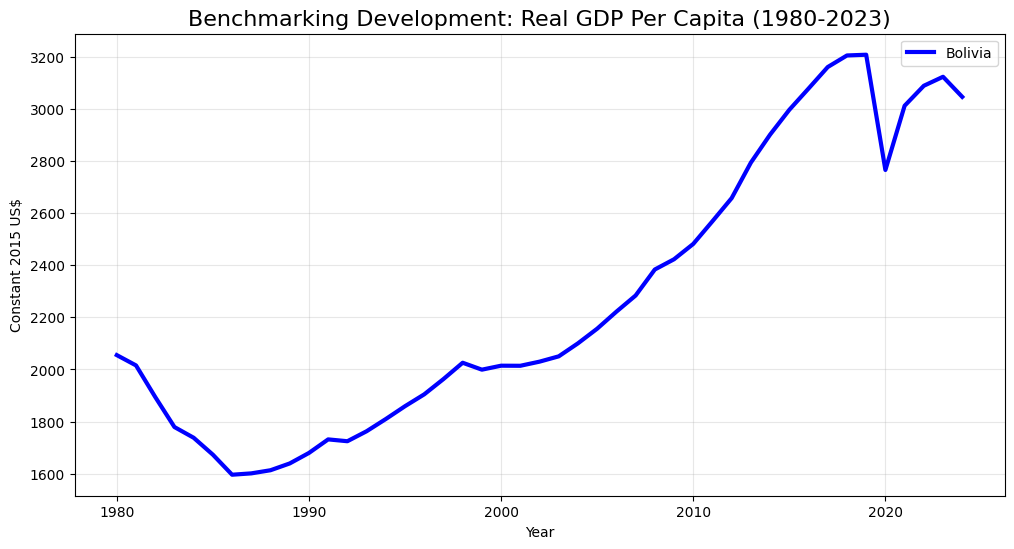

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('BOL', 'GDP_Per_Capita_Const')], label='Bolivia', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (1980-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

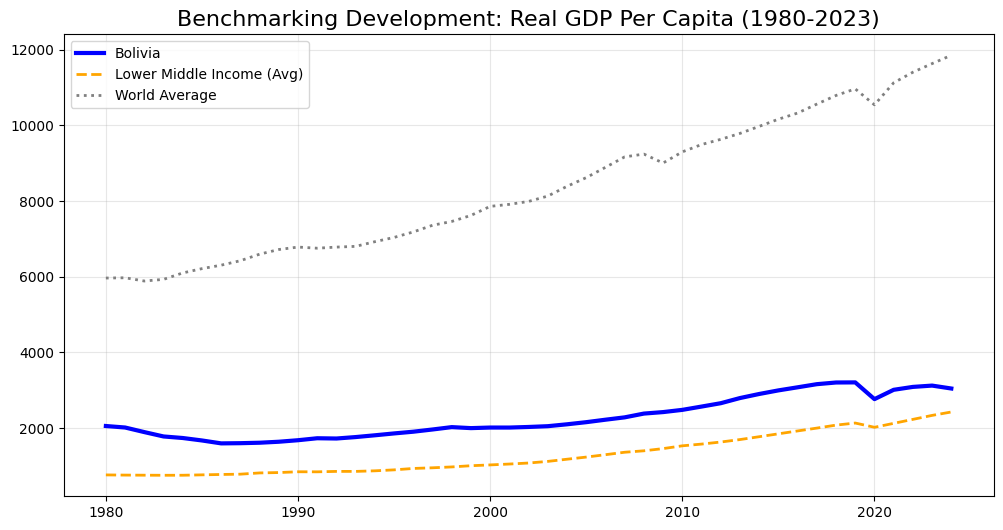

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('BOL', 'GDP_Per_Capita_Const')], label='Bolivia', color='blue', linewidth=3)
plt.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], label='Lower Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
plt.title('Benchmarking Development: Real GDP Per Capita (1980-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

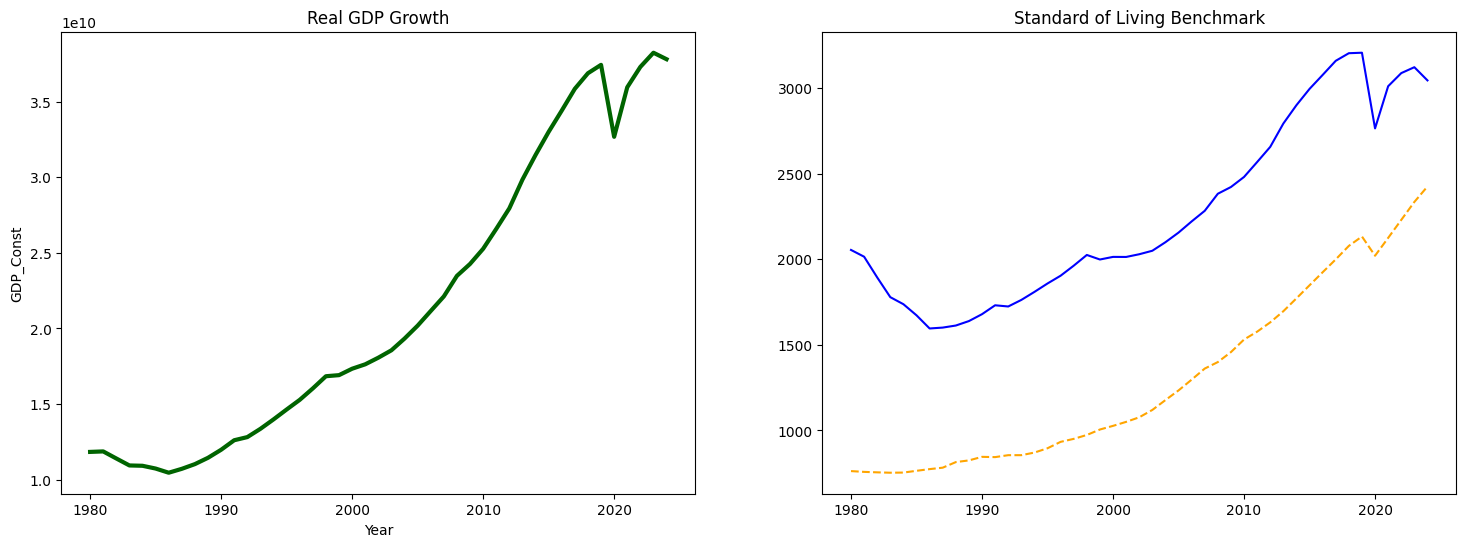

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('BOL', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('LMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

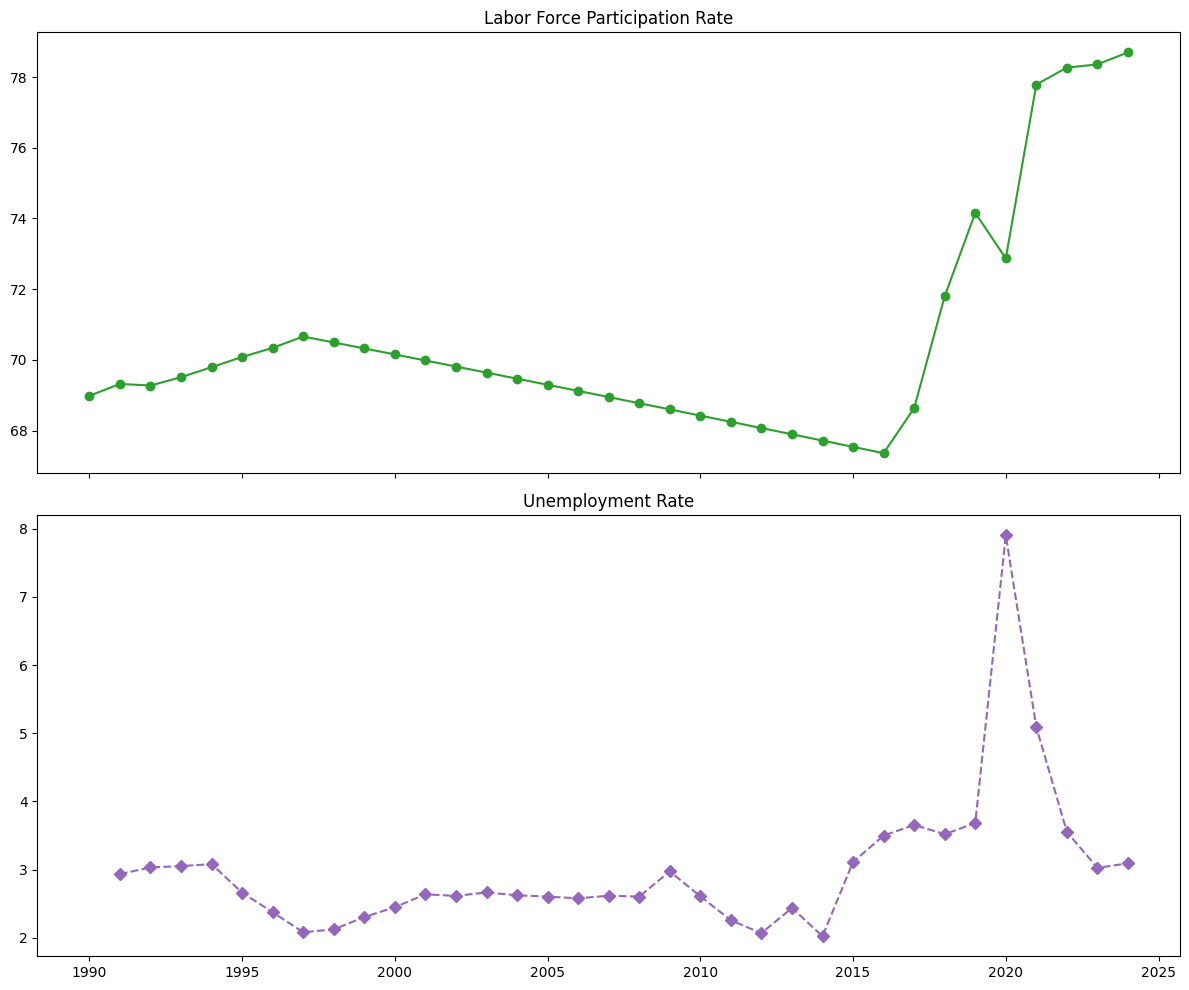

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

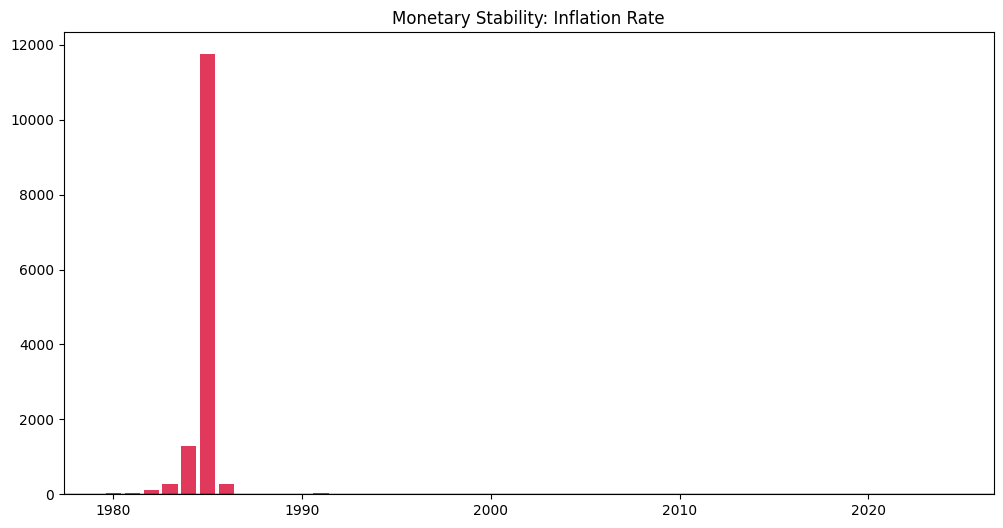

In [67]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#e0395b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

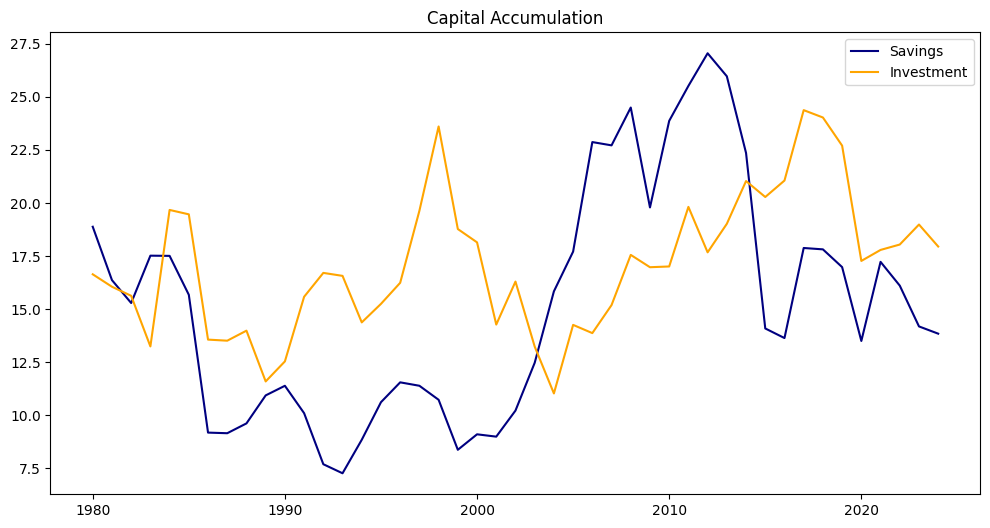

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

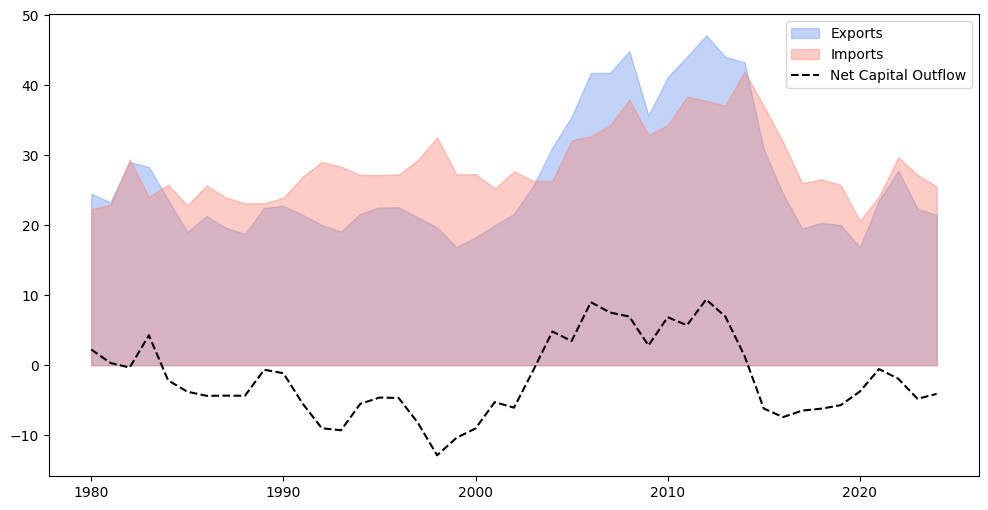

In [69]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

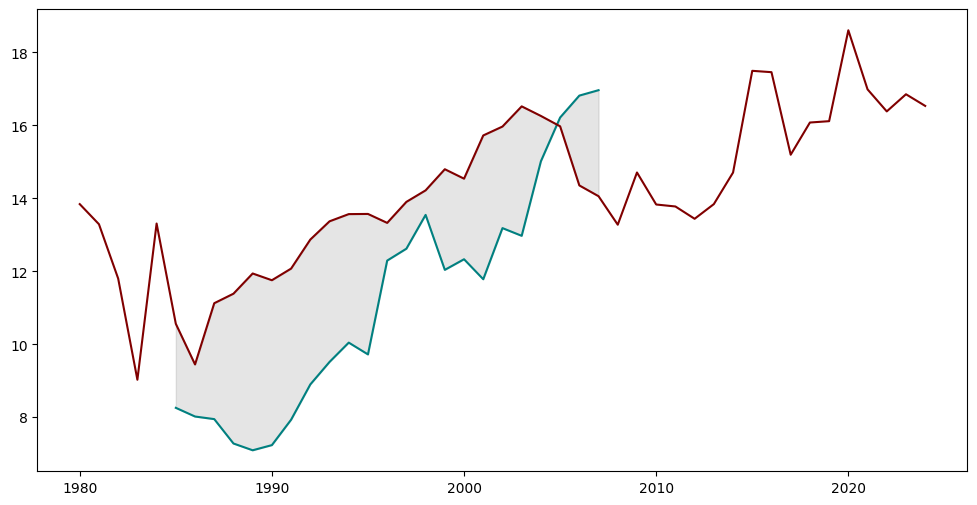

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

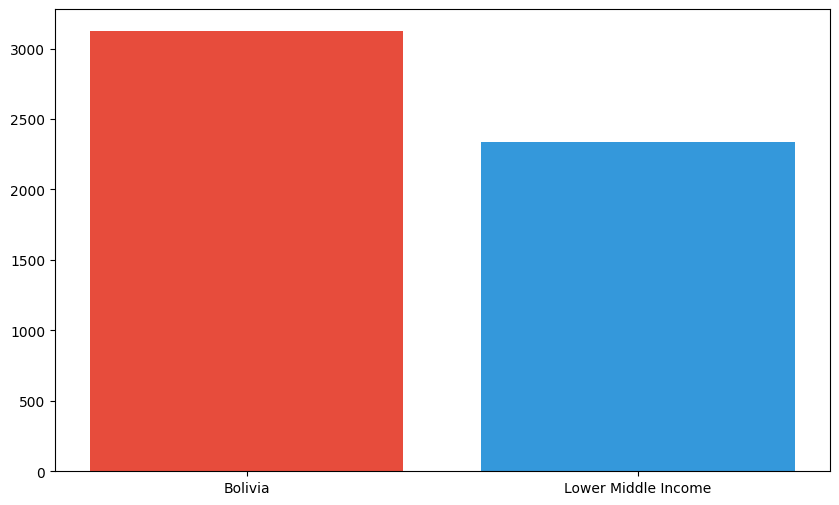

In [71]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
gtm_val = df.loc[snapshot_year, ('BOL', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('LMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Bolivia', 'Lower Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

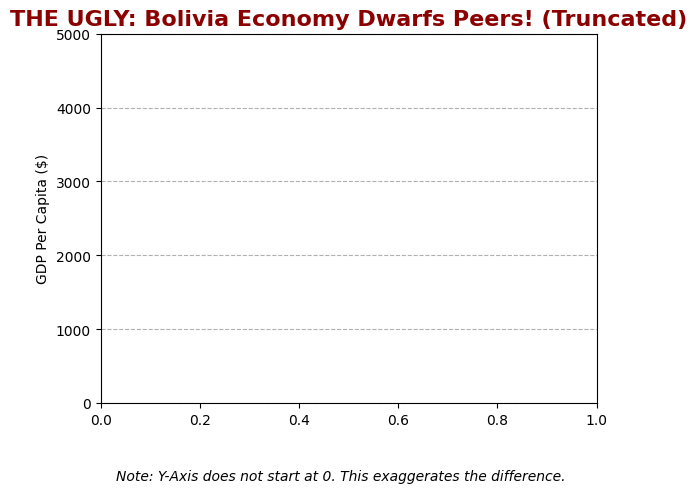

In [72]:
# THE VIOLATION: Truncating the axis
plt.ylim(0, 5000)

plt.title('THE UGLY: Bolivia Economy Dwarfs Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

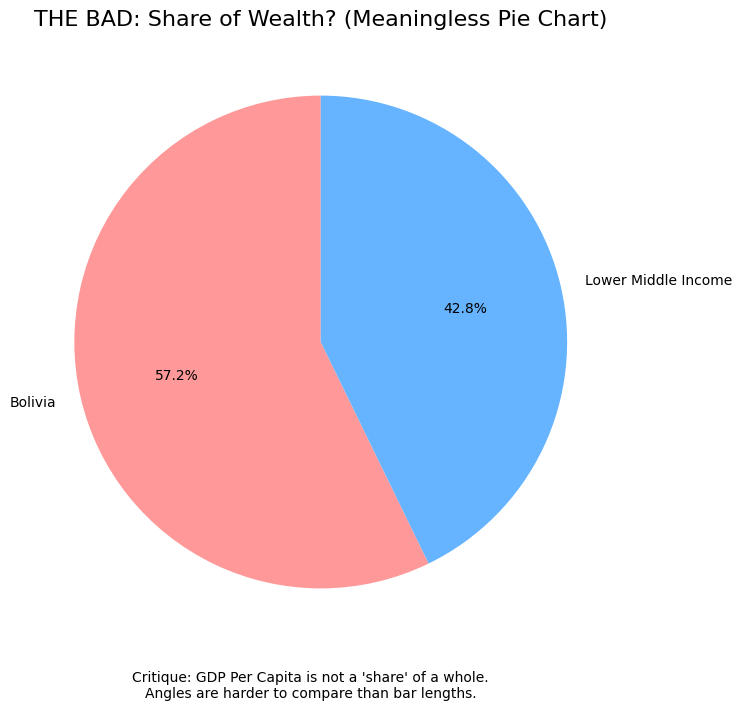

In [73]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()